### Capstone project - Battle of the Neighbourhood week 2
#### This code is to find an good location of another Chinese Restaurant in the City of Toronto
#### The stakeholder is not interested in Chinatown, hence any other good site around the city is what is required


In [190]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [55]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [191]:
pcodeCAN= pd.read_csv('merge.csv') # read from local drive file created previously with all district in Toronto

create a dataframe where "Toronto" is in the borough name

In [192]:
toronto_pdf = pcodeCAN[pcodeCAN.Borough.str.contains("Toronto")] # create a new dataframe where all the boroughs signifies "Toronto"
toronto_pdf

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
31,M6H,West Toronto,"Dovercourt Village, Dufferin",43.669005,-79.442259
36,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752


In [58]:
toronto_pdf.shape

(38, 5)

#### Obtaining coordinates for Toronto, ONTARIO

In [59]:
address = 'Toronto, ONTARIO'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ONTARIO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ONTARIO are 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top

In [60]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto_pdf['Latitude'], toronto_pdf['Longitude'], toronto_pdf['Borough'], toronto_pdf['Neighbourhood']):
#for pcode, borough, neighbourhood, lat, lng in (toronto_pdf['Postcode', 'Borough','Neighborhood','Latitude','Longtitude']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [61]:
CLIENT_ID = 'NZ22H1P5NL3LM5K2YGIE50IIADXCAQ2QGGCRMQ3G0YIMZ0FX' # your Foursquare ID
CLIENT_SECRET = 'S1QB13UYI1ZYT0V2SXGM04WAAM1C0LUQDVIGZ2SK00XXK1SG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


#### Explore the first neighbourhood in Toronto dataframe

In [62]:
toronto_pdf.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [63]:
toronto_pdf.iloc[0]['Neighbourhood']

'Harbourfront, Regent Park'

 Get the neighbourhood's latitude and longitude

In [64]:
neighbourhood_latitude = toronto_pdf.iloc[0]['Latitude'] # neighborhood latitude value
neighbourhood_longitude = toronto_pdf.iloc[0]['Longitude'] # neighborhood longitude value
neighbourhood_name = toronto_pdf.iloc[0]['Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Harbourfront, Regent Park are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Harbo within a radius of 500 meters.

In [65]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)


Send the GET request and examine the results.

In [66]:
results = requests.get(url).json()
#results

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [67]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [68]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Toronto Cooper Koo Family Cherry St YMCA Centre,Gym / Fitness Center,43.653191,-79.357947
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


In [69]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


## 2. Explore Neighbourhoods in Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
# write code to run the above function on each neighbourhood and create a new dataframe called toronto_venues

toronto_venues = getNearbyVenues(names=toronto_pdf['Neighbourhood'],
                                   latitudes=toronto_pdf['Latitude'],
                                   longitudes=toronto_pdf['Longitude']
                                  )


Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [72]:
print(toronto_venues.shape)
toronto_venues.head()

(1690, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront, Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


In [73]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,82,82,82,82,82,82
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


In [74]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


### 3. Analyze Each Neighbourhood

In [75]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [76]:
toronto_onehot.shape

(1690, 233)

#### Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [77]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,0.000000,0.00,0.010000,0.000000,0.030000,0.0000,0.0000,0.000000,0.0000,0.000000,0.020000,0.000000,0.040000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.020000,0.000000,0.01,0.030000,0.000000,0.00000,0.01,0.020000,0.010000,0.00,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.080000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.010000,0.000

In [78]:
## double check the dimension
toronto_grouped.shape

(38, 233)

In [79]:
tor_cr = toronto_grouped[['Neighbourhood','Chinese Restaurant']] # saved for later used in graph generation
tor_cr.head(10)

,Neighbourhood,Chinese Restaurant
0,"Adelaide, King, Richmond",0.000000
1,Berczy Park,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000
5,"Cabbagetown, St. James Town",0.021739
6,Central Bay Street,0.024390
7,"Chinatown, Grange Park, Kensington Market",0.050000
8,Christie,0.000000
9,Church and Wellesley,0.012195


#### Print each neighbourhood with the top 10 most common venues

In [81]:
num_top_venues = 10

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.08
1              Café  0.05
2        Steakhouse  0.04
3               Bar  0.04
4   Thai Restaurant  0.04
5    Breakfast Spot  0.03
6               Gym  0.03
7  Asian Restaurant  0.03
8        Restaurant  0.03
9             Hotel  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2                Café  0.04
3              Bakery  0.04
4  Seafood Restaurant  0.04
5         Cheese Shop  0.04
6          Steakhouse  0.04
7            Beer Bar  0.04
8      Farmers Market  0.04
9      Breakfast Spot  0.02


----Brockton, Exhibition Place, Parkdale Village----
                    venue  freq
0                    Café  0.09
1             Coffee Shop  0.09
2          Breakfast Spot  0.09
3             Yoga Studio  0.04
4           Grocery Store  0.04
5            Climbing Gym  0.04
6      Falafel Restaurant  0.04
7  Furniture / Home Store  0.04
8       

#### Let's put that into a pandas dataframe

 Create a function to sort the venues in decending order

In [82]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each of neighbourhood

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Hotel,American Restaurant,Breakfast Spot,Restaurant,Asian Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Steakhouse,Bakery,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Yoga Studio,Pet Store,Burrito Place,Caribbean Restaurant,Restaurant,Climbing Gym,Performing Arts Venue
3,Business Reply Mail Processing Centre 969 Eastern,Fast Food Restaurant,Auto Workshop,Park,Gym / Fitness Center,Pizza Place,Restaurant,Burrito Place,Skate Park,Smoke Shop,Brewery
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Coffee Shop,Boat or Ferry,Sculpture Garden,Bar,Airport Gate
5,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Café,Flower Shop,Italian Restaurant,Bakery,Pub,Pizza Place,Pet Store,Breakfast Spot
6,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Spa,Bar,Bubble Tea Shop
7,"Chinatown, Grange Park, Kensington Market",Café,Vegetarian / Vegan Restaurant,Chinese Restaurant,Bar,Coffee Shop,Bakery,Dumpling Restaurant,Mexican Restaurant,Vietnamese Restaurant,Arts & Crafts Store
8,Christie,Café,Grocery Store,Park,Convenience Store,Coffee Shop,Italian Restaurant,Baby Store,Restaurant,Athletics & Sports,Nightclub
9,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Pub,Bubble Tea Shop,Café,Men's Store,Mediterranean Restaurant


### 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [84]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [85]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_pdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighbourhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,2,Coffee Shop,Bakery,Café,Park,Pub,Mexican Restaurant,Breakfast Spot,Dessert Shop,Performing Arts Venue,Chocolate Shop
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,2,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Tea Room,Fast Food Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Hotel,Italian Restaurant,Café,Restaurant,Cocktail Bar,Beer Bar,Cosmetics Shop,Clothing Store,Breakfast Spot
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Neighborhood,Other Great Outdoors,Trail,Pub,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Cocktail Bar,Farmers Market,Steakhouse,Bakery,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant


In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Examine Clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster

#### Cluster 1

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,The Beaches,0,Health Food Store,Neighborhood,Other Great Outdoors,Trail,Pub,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
86,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0,Pub,Coffee Shop,Fried Chicken Joint,American Restaurant,Restaurant,Sushi Restaurant,Bagel Shop,Sports Bar,Supermarket,Pizza Place


#### Cluster 2

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,"Forest Hill North, Forest Hill West",1,Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
91,Rosedale,1,Park,Playground,Trail,Building,Yoga Studio,Dive Bar,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


#### Cluster 3

In [89]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Harbourfront, Regent Park",2,Coffee Shop,Bakery,Café,Park,Pub,Mexican Restaurant,Breakfast Spot,Dessert Shop,Performing Arts Venue,Chocolate Shop
9,"Ryerson, Garden District",2,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Tea Room,Fast Food Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant
15,St. James Town,2,Coffee Shop,Hotel,Italian Restaurant,Café,Restaurant,Cocktail Bar,Beer Bar,Cosmetics Shop,Clothing Store,Breakfast Spot
20,Berczy Park,2,Coffee Shop,Cocktail Bar,Farmers Market,Steakhouse,Bakery,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant
24,Central Bay Street,2,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Spa,Bar,Bubble Tea Shop
25,Christie,2,Café,Grocery Store,Park,Convenience Store,Coffee Shop,Italian Restaurant,Baby Store,Restaurant,Athletics & Sports,Nightclub
30,"Adelaide, King, Richmond",2,Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Hotel,American Restaurant,Breakfast Spot,Restaurant,Asian Restaurant
31,"Dovercourt Village, Dufferin",2,Pharmacy,Supermarket,Bakery,Gym / Fitness Center,Music Venue,Park,Café,Middle Eastern Restaurant,Bar,Bank
36,"Harbourfront East, Toronto Islands, Union Station",2,Coffee Shop,Aquarium,Hotel,Café,Italian Restaurant,Scenic Lookout,Brewery,Sporting Goods Shop,Bakery,Pizza Place
37,"Little Portugal, Trinity",2,Bar,Coffee Shop,Asian Restaurant,Vietnamese Restaurant,Café,Restaurant,French Restaurant,Cocktail Bar,Bakery,New American Restaurant


#### Cluster 4

In [90]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,"Moore Park, Summerhill East",3,Playground,Trail,Summer Camp,Yoga Studio,Dive Bar,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


#### Cluster 5

In [91]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Roselawn,4,Music Venue,Home Service,Garden,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [123]:
ncluster3_df=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[2]]

In [125]:
ncluster3_df.head()

2     Harbourfront, Regent Park
9      Ryerson, Garden District
15               St. James Town
20                  Berczy Park
24           Central Bay Street
Name: Neighbourhood, dtype: object

In [138]:
nclu3=pd.merge(left=ncluster3_df, right=tor_cr, left_on='Neighbourhood', right_on='Neighbourhood')
newclu3=nclu3.loc[nclu3['Chinese Restaurant']>0]

In [139]:
newclu3

,Neighbourhood,Chinese Restaurant
1,"Ryerson, Garden District",0.010000
4,Central Bay Street,0.024390
8,"Harbourfront East, Toronto Islands, Union Station",0.010000
11,"Design Exchange, Toronto Dominion Centre",0.010000
14,"Commerce Court, Victoria Hotel",0.010000
15,Studio District,0.025000
19,North Toronto West,0.050000
23,"Harbord, University of Toronto",0.030303
25,"Chinatown, Grange Park, Kensington Market",0.050000
28,"Cabbagetown, St. James Town",0.021739


In [152]:
cclu3=newclu3.copy()
cclu3.sort_values(by='Chinese Restaurant', ascending=True, inplace=True)
cclu3.shape


(11, 2)

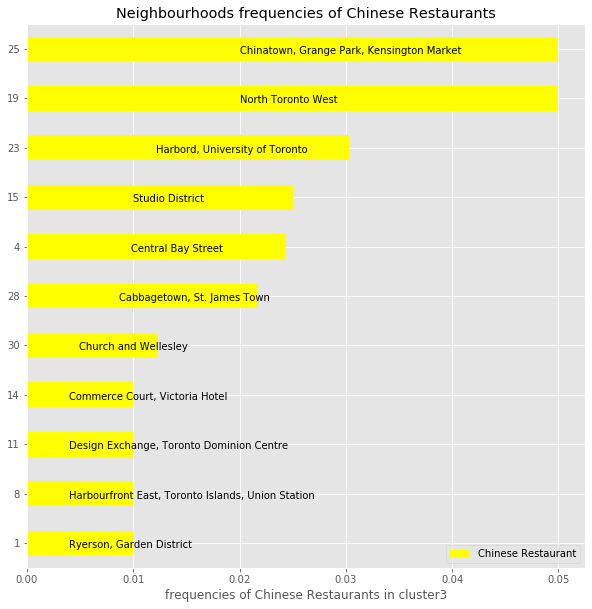

In [189]:
cclu3.plot(kind='barh', figsize=(10, 10), color='yellow')
plt.xlabel('frequencies of Chinese Restaurants in cluster3')
plt.title('Neighbourhoods frequencies of Chinese Restaurants')

# annotate value labels to each country
for index in range(cclu3.shape[0]): 
    label = cclu3.iloc[index,0]; value = cclu3.iloc[index,1]
    plt.annotate(label, xy=(value - (3 * value/5), index - 0.1 ), color='black')

plt.show()


From the clusters we can differentiate the types of similar neighbourhood.
Cluster 3 or Cluster labeled (2) is the one I'd like to examine more as it is cafe, eateries, restaurants that are in most of the top 10
most common venues. Also the graph displayed above were selected as these are the neighbourhood that have some Chinese restaurants. 

#### Obtaining Yonge-Dundas Square latitude and longitude using _geolocator_
The reason is I found the 'Ryerson, Garden District' neighbourhood does not even have Chinese Restaurant in the top 10 most common venues.
Further investigation indicated Yonge-Dundas Square is a busy hub. Outdoor Concerts/Events, Cinemas and Shopping Centres are nearby.
This factor coupled with the scarcity of Chinese Restaurant nearby is worth looking into further.

In [92]:
address = '1 Dundas St E, Toronto, ONTARIO, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6562819 -79.3788002


#### Search for Chinese food that is within 500 metres from the Yonge-Dundas Square. 

In [93]:
search_query = 'Chinese'
radius = 500


#### Define the corresponding URL

In [94]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

#### Send the GET Request and examine the results

In [95]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4fae123d0cad003042d0ca'},
 'response': {'venues': [{'id': '52a7ae41498eed3af4d0a3fa',
    'name': 'Yueh Tung Chinese Restaurant',
    'location': {'address': '126 Elizabeth St.',
     'crossStreet': 'Dundas St.',
     'lat': 43.655281263429195,
     'lng': -79.3853365267765,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.655281263429195,
       'lng': -79.3853365267765}],
     'distance': 538,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['126 Elizabeth St. (Dundas St.)',
      'Toronto ON',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1565502994',
    'hasPerk': False},
   {'id': '4ad

#### Get relevant part of JSON and transform it into a pandas dataframe

In [96]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress
0,52a7ae41498eed3af4d0a3fa,Yueh Tung Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1565502994,False,126 Elizabeth St.,Dundas St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",538,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON, C..."
1,4adf80b9f964a5202f7b21e3,Good View Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1565502994,False,132 Dundas Street East,NaN,43.656791,-79.376139,"[{'label': 'display', 'lat': 43.65679124992238...",221,CA,Toronto,ON,Canada,"[132 Dundas Street East, Toronto ON, Canada]"


#### Define information of interest and filter dataframe

In [97]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,id
0,Yueh Tung Chinese Restaurant,Chinese Restaurant,126 Elizabeth St.,Dundas St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",538,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON, C...",52a7ae41498eed3af4d0a3fa
1,Good View Chinese Restaurant,Chinese Restaurant,132 Dundas Street East,NaN,43.656791,-79.376139,"[{'label': 'display', 'lat': 43.65679124992238...",221,CA,Toronto,ON,Canada,"[132 Dundas Street East, Toronto ON, Canada]",4adf80b9f964a5202f7b21e3


#### Let's visualize the Chinese restaurants that are nearby

In [98]:
dataframe_filtered.name

0    Yueh Tung Chinese Restaurant
1    Good View Chinese Restaurant
Name: name, dtype: object

In [99]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Yonge-Dundas Square',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Let's explore the closest Chinese restaurant -- _Good View Chinese Restaurant_

In [100]:
venue_id = '4adf80b9f964a5202f7b21e3' # ID of Good View Chinese Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)


#### Send GET request for result

In [101]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4adf80b9f964a5202f7b21e3',
 'name': 'Good View Chinese Restaurant',
 'contact': {},
 'location': {'address': '132 Dundas Street East',
  'lat': 43.656791249922385,
  'lng': -79.37613917916755,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.656791249922385,
    'lng': -79.37613917916755}],
  'cc': 'CA',
  'city': 'Toronto',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['132 Dundas Street East', 'Toronto ON', 'Canada']},
 'canonicalUrl': 'https://foursquare.com/v/good-view-chinese-restaurant/4adf80b9f964a5202f7b21e3',
 'categories': [{'id': '4bf58dd8d48988d145941735',
   'name': 'Chinese Restaurant',
   'pluralName': 'Chinese Restaurants',
   'shortName': 'Chinese',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 6},
 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},
 'likes': {'count': 1,
  'groups': [{'type': 'others',
    'count

###  Get the venue's overall rating

In [102]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.0


#### That is not a very good rating. Let's check the rating of the second closest Chinese restaurant.

In [103]:
venue_id = '52a7ae41498eed3af4d0a3fa' # Yueh Tung Chinese Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.6


### Within a radius of 500 metres from Yonge-Dundas square, there are 2 Chinese Restaurants and only one has 7 or above rating. My conclusion is anywhere within the radius 500 metre from Yonge-Dundas is good choice.
